# Khám phá mối quan hệ trong dữ liệu

## Import các thư viện cần thiết

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from wordcloud import WordCloud
from statsmodels.tsa.arima.model import ARIMA
import warnings

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_colwidth', None)

## Đọc dữ liệu từ file csv vào dataframe

In [21]:
data = pd.read_csv("../datasets/data_preprocess.csv", index_col = 0)
data.head()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5


In [22]:
data['date'] = pd.to_datetime(data['date'])
data[['film_code', 'cinema_code']] = data[['film_code', 'cinema_code']].astype(str)
data

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142519,1569,495,1320000,22,0,2,3.86,60000.0,22,569.948187,2018-11-04,11,4,4
142520,1569,474,1200000,15,0,1,65.22,80000.0,15,22.999080,2018-11-04,11,4,4
142521,1569,524,1060000,8,0,3,9.20,132500.0,8,86.956522,2018-11-04,11,4,4
142522,1569,529,600000,5,0,2,5.00,120000.0,5,100.000000,2018-11-04,11,4,4


### Giá vé, số lượng vé bán ra và doanh thu trung bình của các ngày trong tuần

**Trường dữ liệu:**
- `date` và `ticket_price`
- `date` và `tickets_sold`
- `date` và `total_sales`

**Lý do chọn biểu đồ:**
- Biểu đồ cột có thể dễ dàng thấy và so sánh được giữa các ngày trong tuần

**Lý do chọn màu sắc:**
- Khi thêm màu sắc vào biểu đồ giúp người xem có thể dễ dàng phân biệt và so sánh dữ liệu giữa các ngày trong tuần.

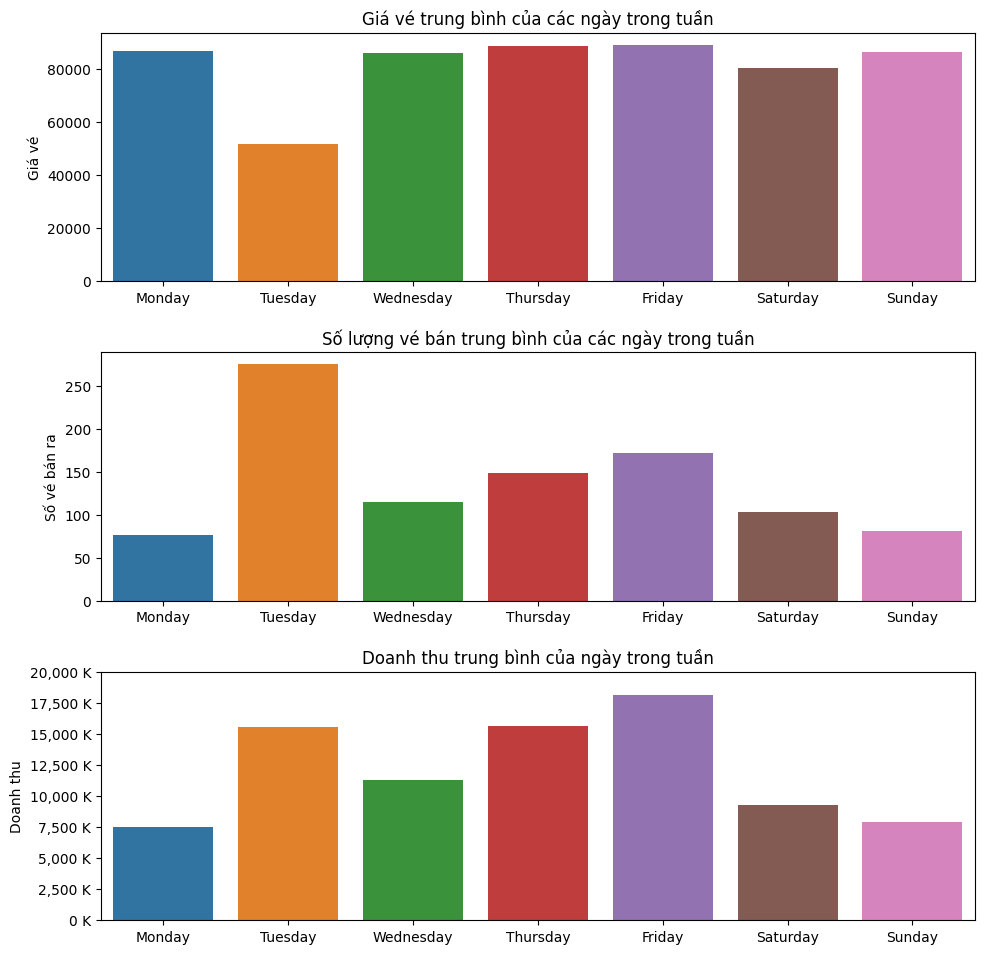

In [23]:
df1 = data.groupby(
    [data['date'].dt.day_of_week, data['date'].dt.day_name()])['ticket_price'].mean().droplevel(0,'index')
df2 = data.groupby(
    [data['date'].dt.day_of_week, data['date'].dt.day_name()])['tickets_sold'].mean().droplevel(0,'index')
df3 = data.groupby([data['date'].dt.day_of_week, data['date'].dt.day_name()])['total_sales'].mean().droplevel(0,'index')

figure, (ax1, ax2, ax3) = plt.subplots(3, 1)

figure.set_size_inches(10, 10)
figure.tight_layout(pad=3)

sns.barplot(data=df1.reset_index(), x='date', y='ticket_price', ax=ax1)
sns.barplot(data=df2.reset_index(), x='date', y='tickets_sold', ax=ax2)
sns.barplot(data=df3.reset_index(), x='date', y='total_sales', ax=ax3)

yticks = ax3.get_yticks()
ylabels = ['{:,.0f} K'.format(y) + '' for y in yticks/1000]

ax1.set_title("Giá vé trung bình của các ngày trong tuần")
ax1.set_xlabel("")
ax1.set_ylabel("Giá vé")
ax2.set_title("Số lượng vé bán trung bình của các ngày trong tuần")
ax2.set_xlabel("")
ax2.set_ylabel("Số vé bán ra")
ax3.set_title("Doanh thu trung bình của ngày trong tuần")
ax3.set_xlabel("")
ax3.set_ylabel("Doanh thu")
ax3.set_yticks(yticks, ylabels)

plt.show()

**Nhận xét:**
  * Giá vé vào thứ ba thấp nhất do đó số vé bán ra vào ngày này cũng nhiều nhất. Có thể các rạp phim có các chương trình khuyến mãi giảm giá vé vào thứ ba, lượng vé vào thứ ba cũng cao hơn rất nhiều so với nhưng ngày khác điều này chứng tỏ việc giảm giá vé của các rạp có hiệu quả rất cao.
  * Tuy lượng vé bán ra vào thứ ba là cao nhất nhưng doanh thu vào thứ sáu lại đứng đầu. Các khách hàng có xu hướng đi xem phim nhiều vào ngày thứ sáu mặc cho giá vé không giảm. Có thể do thứ sáu là ngày cuối tuần mọi người thường xem phim sau 1 tuần làm việc,...
  * Doanh thu vào thứ ba cao thứ hai trong tuần. Có thể do giá vé vào thứ ba là thấp nhất trong tuần.
  * 2 ngày cuối tuần có doanh thu thấp nhất. Có thể thấy khách hàng không có thị hiếu dành thời gian nghỉ cuối tuần để đi xem phim.

### Doanh thu trung bình của các ngày trong tháng

**Trường dữ liệu: `day`, `total_sales`**
- Lý do chọn biểu đồ:
  - Biểu đồ cột có thể dễ dàng thấy và so sánh được giữa các ngày trong tháng

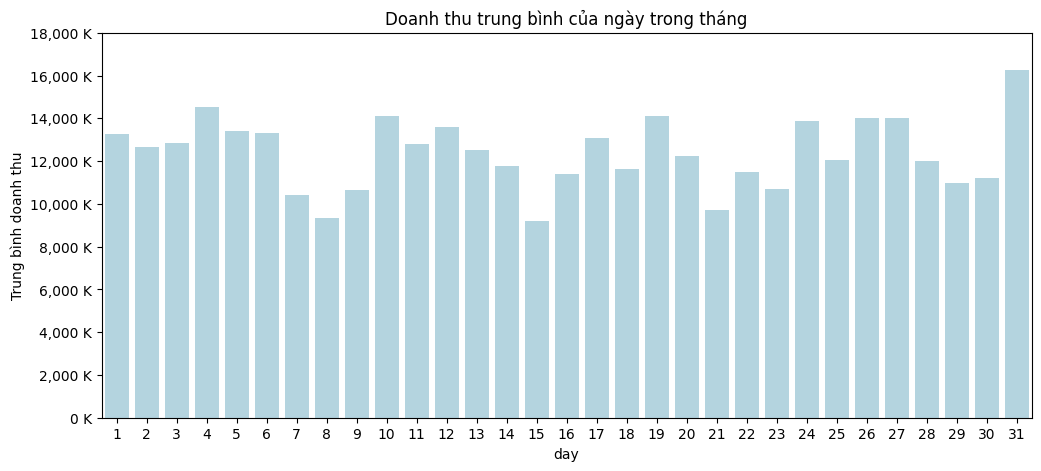

In [24]:
df = data.groupby(['day'])['total_sales'].mean()

plt.gcf().set_size_inches(12, 5)
sns.barplot(data=df.reset_index(), x='day', y='total_sales', palette=['lightblue'])

yticks = plt.gca().get_yticks()
ylabels = ['{:,.0f} K'.format(y) + '' for y in yticks/1000]

plt.title('Doanh thu trung bình của ngày trong tháng')
plt.yticks(yticks, ylabels)
plt.ylabel('Trung bình doanh thu')
plt.show()

**Nhận xét:**
  * Sự chênh lệch giữa các ngày trong tháng không quá nhiều. Chỉ có ngày 8, 15, 21 có vẻ bị thấp hơn so với các ngày còn lại, nguyên nhân có thể do các ngày này rơi nhiều vào thứ bảy và chủ nhật.

### Xếp hạng phim theo doanh thu

**Trường dữ liệu: `film_code`, `total_sales`**
- Lý do chọn biểu đồ:
  - Biểu đồ cột có thể dễ dàng thấy và so sánh được doanh thu giữa các phim

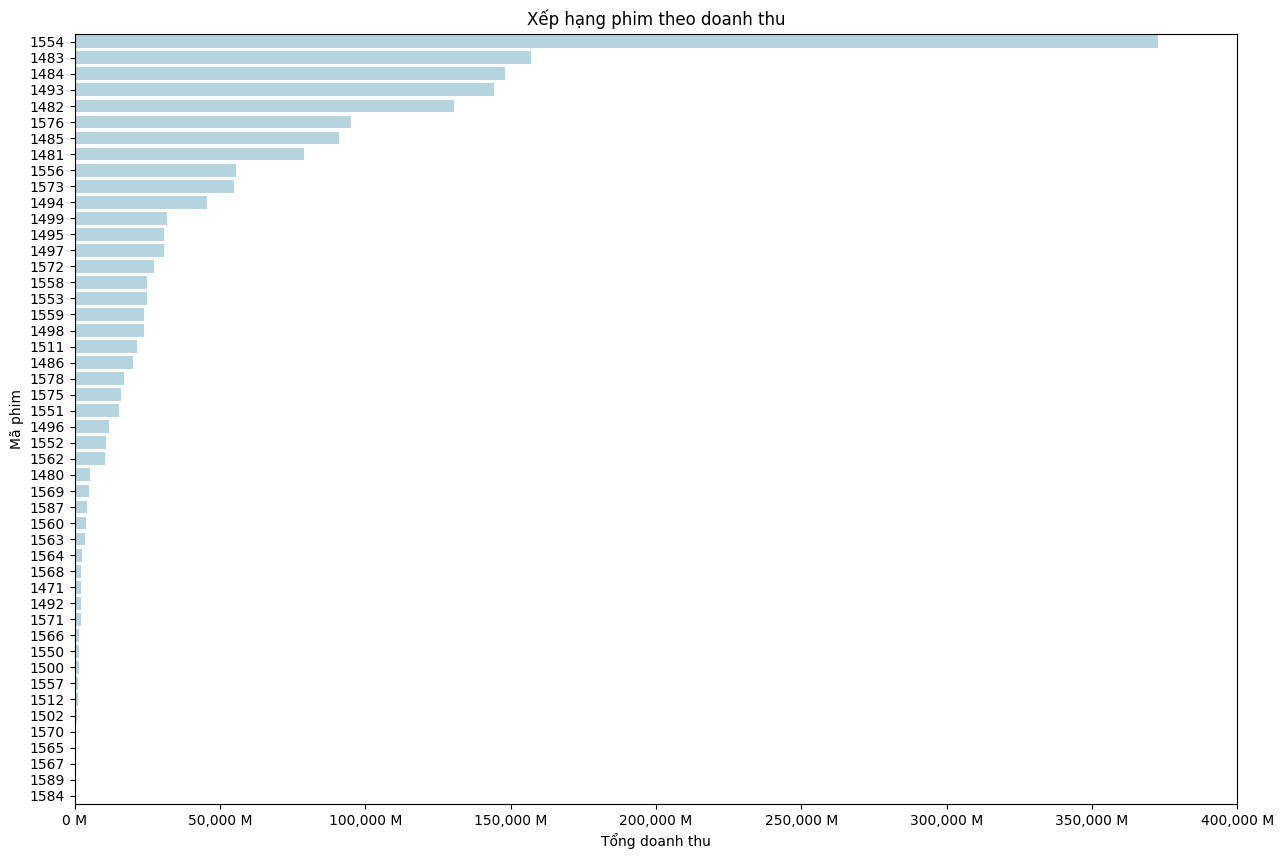

In [25]:
df = data.groupby(['film_code'])['total_sales'].sum().sort_values(ascending=False)

plt.gcf().set_size_inches(15, 10)
sns.barplot(data=df.reset_index(), x='total_sales', y='film_code', palette=['lightblue'])

xticks = plt.gca().get_xticks()
xlabels = ['{:,.0f} M'.format(x) + '' for x in xticks/1000000]

plt.title('Xếp hạng phim theo doanh thu')
plt.xticks(xticks, xlabels)
plt.xlabel('Tổng doanh thu')
plt.ylabel('Mã phim')
plt.show()


**Nhận xét:**
  * Phim có doanh thu cao nhất chênh lệch rất nhiều so với các phim còn lại (gấp hơn 2 lần doanh thu phim ở vị trí thứ 2). Dựa trên doanh thu, có thể thấy được bộ phim ở vị trí dẫn đầu chắc chắn là bộ phim rất hay, nổi bật, được khán giả yêu thích và đáng để xem.
  * Các bộ phim ở trong top 10 đều có doanh thu trên 50,000 M. Ở các mốc top 1, top 5 và top 8 thì sự chênh lệch doanh thu khá lớn, ngoài ra thì tổng quan sự chênh lệch giữa các bộ phim xếp hạng kế nhau là không quá lớn. 

### Xếp hạng phim theo tỉ lệ hủy vé

**Trường dữ liệu: `film_code`, `tickets_out`, `tickets_sold`**
- Lý do chọn biểu đồ:
  - Biểu đồ cột có thể dễ dàng thấy và so sánh được tỉ lệ hủy vé giữa các phim

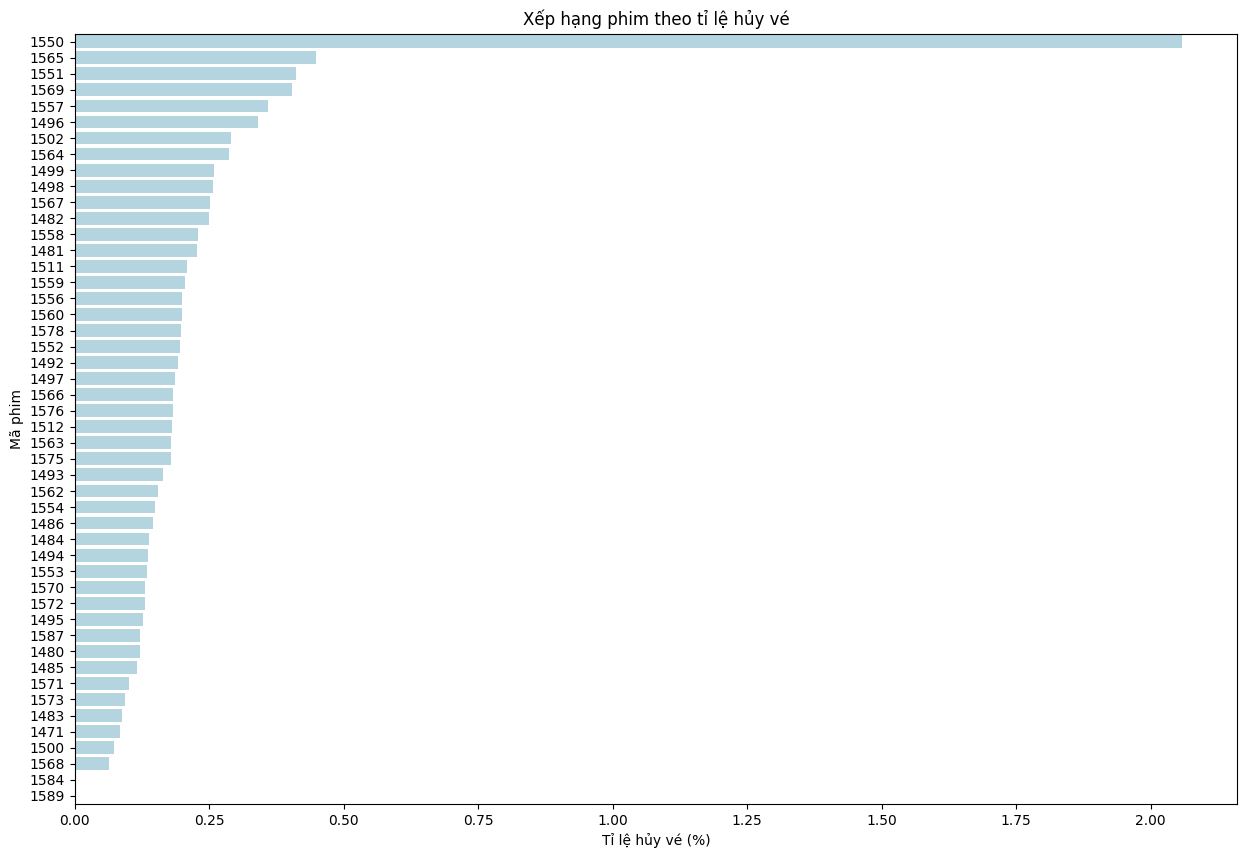

In [26]:
df = data.groupby(['film_code']).agg({'tickets_out': 'sum', 'tickets_sold': 'sum'})
df['tickets_out_percent'] =(df['tickets_out'] / df['tickets_sold']) * 100

plt.gcf().set_size_inches(15, 10)
sns.barplot(data=df.reset_index().sort_values(by='tickets_out_percent', ascending=False), x='tickets_out_percent', y='film_code', palette=['lightblue'])

plt.title('Xếp hạng phim theo tỉ lệ hủy vé')
plt.xlabel('Tỉ lệ hủy vé (%)')
plt.ylabel('Mã phim')
plt.show()

**Nhận xét:**
  * Bộ phim có mã 1550 có tỉ lệ hủy vé cao nhất (gấp hơn 4 lần so với phim ở vị trí thứ 2). Tỉ lệ hủy vé cao như thế này chắc chắn không phải do nguyên nhân khách quan, việc hủy vé từ khán giả có thể do chất lượng của bộ phim.
  * Nhìn chung ở các bộ phim còn lại đều có tỉ lệ hủy vé thấp (dưới 0.5 %). Tỉ lệ này khá thấp nên nguyên nhân chủ yếu có thể do từ các yếu tố khách quan (bận đột xuất,...)

### Các biến động của phim có doanh thu cao nhất theo thời gian

**Trường dữ liệu: `film_code`, `month`, `tickets_sold`, `total_sales`, `ticket_price`**
- Lý do chọn biểu đồ:
  - Biểu đồ đường có thể dễ dàng thấy được biến động theo thời gian

Text(42.722222222222214, 0.5, 'Giá vé')

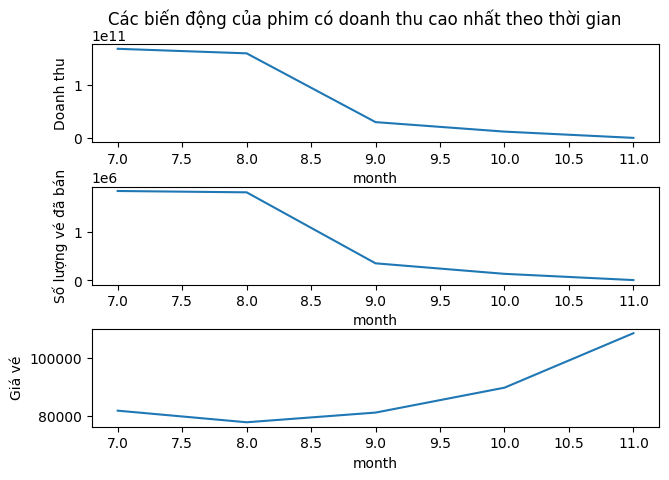

In [27]:
df = data[data['film_code'] == '1554']
df = df.groupby(['month']).agg({'total_sales': 'sum', 'ticket_price': 'mean', 'tickets_sold': 'sum'})

fig, ax = plt.subplots(3, 1)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

sns.lineplot(x='month', y='total_sales', 
             data=df.reset_index(), ax=ax[0])
sns.lineplot(x='month', y='tickets_sold', 
             data=df.reset_index(), ax=ax[1])
sns.lineplot(x='month', y='ticket_price', 
             data=df.reset_index(), ax=ax[2])

fig.suptitle('Các biến động của phim có doanh thu cao nhất theo thời gian')
ax[0].set_ylabel('Doanh thu')
ax[1].set_ylabel('Số lượng vé đã bán')
ax[2].set_ylabel('Giá vé')


**Nhận xét:**
  * Doanh thu của bộ phim ở 1 tháng đầu là cao nhất, giảm mạnh ở 1 tháng sau đó và giảm chậm ở thời gian tiếp theo. Nguyên nhân là do ở 1 tháng đầu là thời gian bộ phim vừa phát hành nên rất hot, lượng người xem là rất cao. Ở tháng tiếp theo thì lượng người đã xem ở tháng đầu là rất nhiều nên doanh thu ở thời gian này bị giảm mạnh.
  * Lượng vé bán ra khá tương đồng với doanh thu của nó. Đây cũng có thể giải thích được biến động của doanh thu như trên.
  * Giá vé lại thấp ở thời gian mới phát hành và tăng dần thời gian sau đó. Có thể do sau thời gian dài phát hành, các rạp chiếu bộ phim này rất ít nên giá vé sẽ tăng cao, tuy nhiên việc giá vé tăng cao lại không giúp doanh thu tăng theo, do lượng vé bán ra vào thời gian này là rất ít. 